### Homework: Monte Carlo Integration

#### Consider the following integration problem:

\begin{aligned}
 I = \int_a^b g(x) dx,
\end{aligned}

where $\{ a,b \}$ = $\{1, 2.5\}$ and $g(x) = 1/(1+x^2)$.

- Compute the expected value of $g(x)$: Write a Julia function to compute the expected value of $g(x)$ when $x \in (a,b)$ using the Monte Carlo method. That is, compute $E[g(x)]$, $x \in (a,b)$, which is NOT the same as the integration value $I$. The function should take $a$, $b$, and $n$ (the number of random draws) as inputs. The random numbers should be drawn from $[a,b]$. Show the numerical result with n=10,000.

- Compute the integration value $I$: Write down the solution of the integration problem as a function of the expected value of $g(x)$. Write a Julia function to compute the value, where the function should take $a$, $b$, and $n$ (the number of random draws) as inputs. Do not use the change of variables (yet). Show the numerical result with n=10,000.

 - Hint: The previous two questions force you to recognize that the integration problem of $I$ may not be stated as the expected value of $g(x)$.

- Compute the integration value $I$ using changes of variables: Write a Julia function which uses the change of variables to convert the problem's domain to $[0,1]$. The function should include the transformation rule and the Jacobian, and it should take $a$, $b$, and $n$ (the number of random draws) as inputs. Show the numerical result with n=10,000.

In [1]:
using Distributions

function ExpextV(a, b, n)
    g(x) = 1/(1 + x^2)
    set = rand(Uniform(a, b), n)
    answer = sum(g.(set))
    answer = answer/ n
    return answer
end

function Intg(a, b, n)
    g(x) = 1/(1 + x^2)
    set = rand(Uniform(a, b), n)
    answer = sum(g.(set))
    answer = (b - a) * answer / n
    return answer
end

function VariIntg(a, b, n)
    x(t) = a + (b - a) * t
    g(x) = 1/(1 + x^2)
    f(t) = g(x(t)) * (b - a)
    set = rand(Uniform(0, 1), n)
    answer = sum(f.(set))
    answer = answer / n
    return answer
end

print("E[g(x)] = ", ExpextV(1, 2.5, 10000), "\n") # E[g(x)].
print("I value = ", Intg(1, 2.5, 10000), "\n") # I value.
print("I value by changing variables = ", VariIntg(1, 2.5, 10000)) # I value by changing variables.

E[g(x)] = 0.2673938712225217
I value = 0.4048320698732528
I value by changing variables = 0.40332325333894614

#### Consider the following integration problem: 
\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}
  
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

WebIO._IJuliaInit()

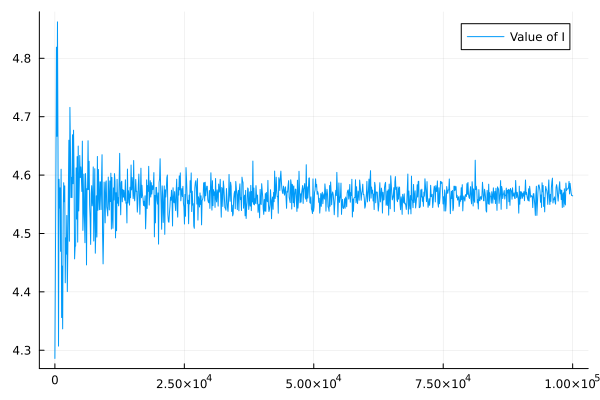

In [2]:
using Distributions, Plots, Interact, WebIO, StatsPlots
function VariIntg(n)
    x(t) = (2*t-1)/(t-t^2)
    g(x) = exp(-(x^2)/3)sqrt(1+x^2)
    f(t) = g(x(t))*(2*(t^2)-2*t+1)/(t^2-t)^2
    set = rand(Uniform(0, 1), n)
    answer = sum(f.(set))
    answer = answer / n
    return answer
end

answer = []
for n in 100:100:100000
    push!(answer,VariIntg(n))
end

plot(range(0,100,length = 1000).*1000,answer,label = "Value of I")